# Linear Regression

Linear regression model:
$$\hat{y} = \theta_{0} + \theta_{1} x_{1} + \theta_{2} x_{2} + ... + \theta_{n} x_{n}$$
$$\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x}$$

- What does training a linear regression model mean?
    - It means setting its parameters so that the model best fits the training set.
    - First, we need a measure of how well/poorly the model fits the data. We can use RMSE.
    - Find value of $\mathbf{\theta}$ that minimizes the RMSE, or the MSE.


## The Normal Equation

$$\hat{\mathbf{\theta}} = (\mathbf{X}^{T}\mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

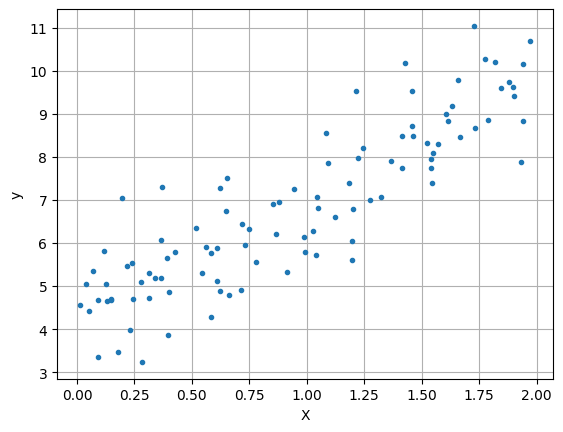

In [2]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m, 1)
y = 4 + 3*X + np.random.randn(m, 1)
plt.plot(X, y, ".")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [3]:
from sklearn.preprocessing import add_dummy_feature

In [4]:
X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @X_b.T @ y

In [5]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
X_new = np.array([[0], [2]])
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Computational Complexity

- The Normal equation computes the inverse of $\mathbf{X}^{T}\mathbf{X}$, which is an $(n+1)\times(n+1)$ matrix. $n$ = number of features.
- The computational complexity of inverting such a matrix is about $\mathcal{O}(n^{2.4})$ to $\mathcal{O}(n^{3})$. This means if you double the number of features, you multiply the computation by roughly $2^{2.4}=5.3$ to $2^{2.4}=8$.
- The SVD approach used by sklearn's `LinearRegression` class is about $\mathcal{O}(n^{2})$. This means if you double the number of features, you multiply the computation by roughly $2^{2}=4$.
- Both Normal equation and SVD approach get very slow when number of features grows large (eg $100,000$).
- Note that both are linear with regard to the number of instances in the training set, ie $\mathcal{O}(m)$, so they handle large training sets efficiently, provided they can fit in memory.
- Also, once you have trained your linear regression model (using the Normal equation or any other algorithm), predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features.

# Gradient Descent

- The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function.
- An important parameter in gradient descent is the size of the steps, determined by the learning rate hyperparameter.
- Not all cost functions look like nice, regular bowls. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult. Fortunately, the MSE cost function for a linear regression model happens to be a convex function.
- While the cost function has the shape of a bowl, it can be an elongated bowl if the features have very different scales.

## Batch Gradient Descent

- To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_{j}$, ie the partial deriv of cost function wrt each $\theta_{j}$.

<img src="images/MSE_partial_deriv.png">

Gradient of cost function:

<img src="images/MSE_gradient.png">

- Batch gradient descent: calculations over the full training set $\mathbf{X}$, at each gradient descent step.

<img src="images/batch_gradient_descent_step.png">

where $\eta$ = learning rate.

In [10]:
eta = 0.1
n_epochs = 100
m = len(X_b)

print("learning rate:")
print(eta)
print()

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialization

print("Random IC:")
print(theta)

for epoch in range(n_epochs): #each iteration over the training set is called an epoch
    gradients = 2/m * X_b.T@(X_b@theta - y)
    theta = theta - eta*gradients

print()
print("Resulting theta")
print(theta)

learning rate:
0.1

Random IC:
[[ 0.49671415]
 [-0.1382643 ]]

Resulting theta
[[4.19463891]
 [2.78817602]]


In [11]:
eta = 0.02
n_epochs = 100
m = len(X_b)

print("learning rate:")
print(eta)
print()

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialization

print("Random IC:")
print(theta)

for epoch in range(n_epochs): #each iteration over the training set is called an epoch
    gradients = 2/m * X_b.T@(X_b@theta - y)
    theta = theta - eta*gradients

print()
print("Resulting theta")
print(theta)

learning rate:
0.02

Random IC:
[[ 0.49671415]
 [-0.1382643 ]]

Resulting theta
[[3.88741338]
 [3.05832358]]


In [12]:
eta = 0.5
n_epochs = 100
m = len(X_b)

print("learning rate:")
print(eta)
print()

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialization

print("Random IC:")
print(theta)

for epoch in range(n_epochs): #each iteration over the training set is called an epoch
    gradients = 2/m * X_b.T@(X_b@theta - y)
    theta = theta - eta*gradients

print()
print("Resulting theta")
print(theta)

learning rate:
0.5

Random IC:
[[ 0.49671415]
 [-0.1382643 ]]

Resulting theta
[[-1668.78568264]
 [-1892.02464317]]


- $\eta = 0.02$ is too low, ie algo will take long time to reach the solution.
- $\eta = 0.1$ looks pretty good.
- $\eta = 0.5$ is too high, ie algo diverges, jumping all over the place and actually getting further away from the solition at each step.

- USe grid search to find a good learning rate $\eta$.

- How to decide how many epochs to set? What's too long, and what's not long enough?
- Solution: set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny - ie when its norm becomes smaller than a tiny number $\epsilon$ (called the tolerance).


- Main problem with batch gradient descent: it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large.

## Stochastic Gradient Descent

- Stochastic gradient descent: pick a random instance in the training set at every step and computes the gradients based only on that single instance. Ie ...
- Working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.
- But, due to its stochastic nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only
on average.

In [13]:
n_epochs = 50
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1) #random initialization
print("Random IC:")
print(theta)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) #for SGD, do not divide by m
        eta = learning_schedule(epoch*m + iteration) #eta decreases over time
        theta = theta - eta * gradients

print()
print("Resulting theta")
print(theta)

Random IC:
[[ 0.49671415]
 [-0.1382643 ]]

Resulting theta
[[4.21076011]
 [2.74856079]]


In [14]:
from sklearn.linear_model import SGDRegressor

In [15]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

In [16]:
y.ravel()

array([ 6.33428778,  9.40527849,  8.48372443,  5.60438199,  4.71643995,
        5.29307969,  5.82639572,  8.67878666,  6.79819647,  7.74667842,
        5.03890908, 10.14821022,  8.46489564,  5.7873021 ,  5.18802735,
        6.06907205,  5.12340036,  6.82087644,  6.19956196,  4.28385989,
        7.96723765,  5.09801844,  5.75798135,  5.96358393,  5.32104916,
        8.29041045,  4.85532818,  6.28312936,  7.3932017 ,  4.68275333,
        9.53145501,  5.19772255,  4.64785995,  9.61886731,  7.87502098,
        8.82387021,  5.88791282,  7.0492748 ,  7.91303719,  6.9424623 ,
        4.69751764,  5.80238342,  5.34915394, 10.20785545,  6.34371184,
        7.06574625,  7.27306077,  5.71855706,  7.86711877,  7.29958236,
        8.82697144,  8.08449921,  9.73664501,  8.86548845,  6.03673644,
        9.59980838,  3.4686513 ,  5.64948961,  3.3519395 ,  7.50191639,
        5.54881045,  5.30603267,  9.78594227,  4.90965564,  5.91306699,
        8.56331925,  3.23806212,  8.99781574,  4.70718666, 10.70

In [17]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-Batch Gradient Descent

- At each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches.

# Polynomial Regression

- What if the data was more complex than a straight line?
- Thankfully, a linear model can be used to fit nonlinear data - by adding powers of each feature as new features, and training the model on this extended set of features.

As an example, generate some data based on a quadratic equation: $y = ax^{2} + bx + c$

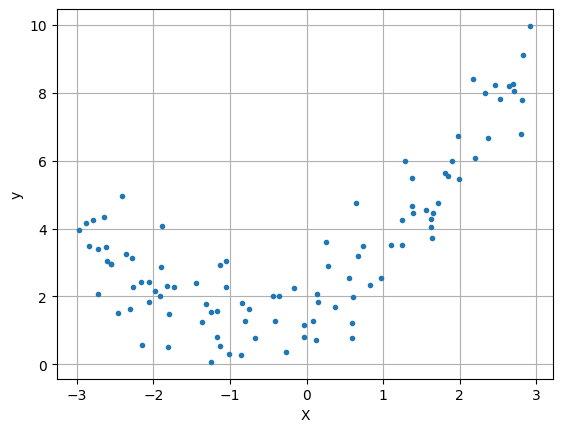

In [19]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, ".")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([-0.75275929])

In [23]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# Learning Curves

- How can you tell that your model is overfitting or underfitting the data?
- Use cross-validation to get an estimate of a model's generalization performance
    - If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting.
    - If it performs poorly on both, then it is underfitting.

- Alternatively, look at the learning curves, ie plots of the model's training error and validation error as a function of the training iteration.

In [25]:
from sklearn.model_selection import learning_curve

In [27]:
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error"
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

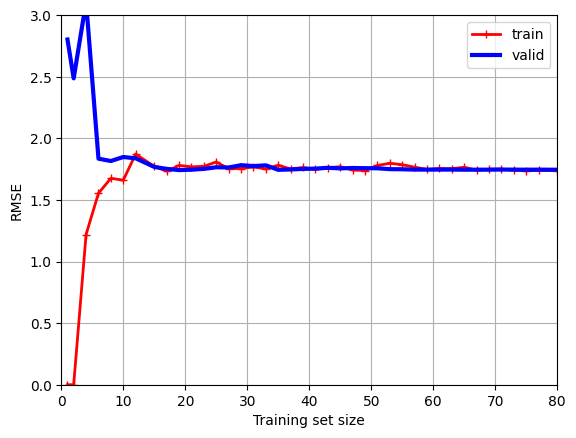

In [31]:
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.xlim([0, 80])
plt.ylim([0, 3])
plt.grid(True)
plt.legend()
plt.show()

^This model is underfitting.
Why?
- 

# Regularized Linear Models

# Logistic Regression

## Estimating Probabilities

- Logistic regression:
    - used to estimate the probability that an instance belongs to a particular class.
    - if the estimated prob > given threshold, then the model predicts that the instance belongs to that class 1, otherwise it belongs to class 0.
    - binary classifier

$\hat{p} = h_{\theta} (x) = \sigma(\theta^{T} x)$

$\sigma(t) = \frac{1}{1 + e^{-t}}$

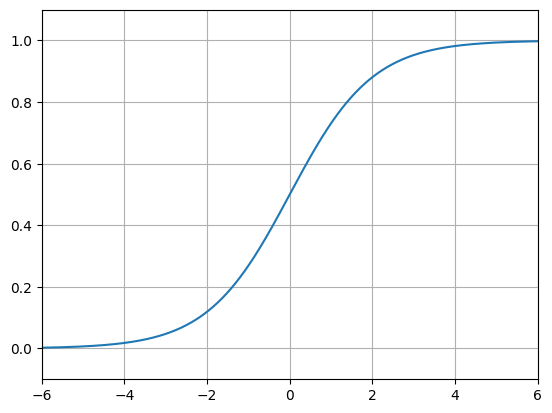

In [37]:
def logistic_func(t):
    return 1/(1 + np.exp(-t))

x_line = np.linspace(-6, 6, 1000)
y_line = logistic_func(x_line)

plt.plot(x_line, y_line)
plt.xlim([-6, 6])
plt.ylim([-0.1, 1.1])
plt.grid(True)
plt.show()

$\hat{y} = 0$ if  $\hat{p}<0.5$<br>
$\hat{y} = 1$ if  $\hat{p}\geq0.5$

## Training and Cost Function

## Decision Boundaries

Iris dataset:
- contains sepal and petal length and wisth of 150 iris flowers
- three different species: iris setosa, iris versicolor, iris virginica

Let’s try to build a classifier to detect the Iris virginica type based only on the petal width feature.

In [39]:
from sklearn.datasets import load_iris

In [40]:
iris = load_iris(as_frame=True)

In [41]:
iris

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
 0                  5.1               3.5                1.4               0.2
 1                  4.9               3.0                1.4               0.2
 2                  4.7               3.2                1.3               0.2
 3                  4.6               3.1                1.5               0.2
 4                  5.0               3.6                1.4               0.2
 ..                 ...               ...                ...               ...
 145                6.7               3.0                5.2               2.3
 146                6.3               2.5                5.0               1.9
 147                6.5               3.0                5.2               2.0
 148                6.2               3.4                5.4               2.3
 149                5.9               3.0                5.1               1.8
 
 [150 rows x 4 columns],
 'target': 0     

In [42]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [44]:
iris["data"].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [45]:
iris["target"].head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [46]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [60]:
X = iris["data"][["petal width (cm)"]].values
y = iris["target_names"][iris["target"]]=="virginica"


In [53]:
X

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.1],
       [0.1],
       [0.2],
       [0.4],
       [0.4],
       [0.3],
       [0.3],
       [0.3],
       [0.2],
       [0.4],
       [0.2],
       [0.5],
       [0.2],
       [0.2],
       [0.4],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.4],
       [0.1],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.1],
       [0.2],
       [0.2],
       [0.3],
       [0.3],
       [0.2],
       [0.6],
       [0.4],
       [0.3],
       [0.2],
       [0.2],
       [0.2],
       [0.2],
       [1.4],
       [1.5],
       [1.5],
       [1.3],
       [1.5],
       [1.3],
       [1.6],
       [1. ],
       [1.3],
       [1.4],
       [1. ],
       [1.5],
       [1. ],
       [1.4],
       [1.3],
       [1.4],
       [1.5],
       [1. ],
       [1.5],
       [1.1],
       [1.8],
      

In [61]:
y

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [64]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

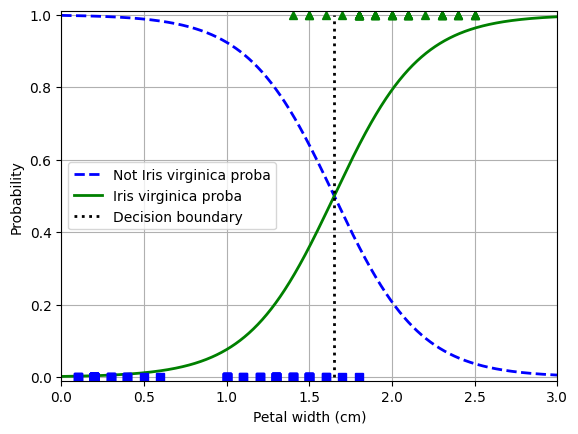

In [70]:
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2, label="Decision boundary")

plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.xlim([0, 3])
plt.ylim([-0.01, 1.01])
plt.legend()
plt.grid(True)
plt.show()

In [71]:
decision_boundary

1.6516516516516517

In [72]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

## Softmax Regression

Softmax regression / multinomial regression:
- logistic regression can be generalized to support multiple classes directly

In [74]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [76]:
softmax_reg.predict([[5, 2]])

array([2])

In [77]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])